In [1]:
import os
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt

path="/home/jiahao/GS-IR/datasets/TensoIR/lego/train_001"
pbr_img_path = os.path.join(path, "pbr_bridge.png")
gt_img_path=os.path.join(path, "rgba_bridge.png")
# 读取图片
pbr_image = Image.open(pbr_img_path)
gt_image = Image.open(gt_img_path)

#将对应的image转化为np.array
pbr_image_np = np.array(pbr_image)
gt_image_np = np.array(gt_image)

pbr_image_tensor=torch.from_numpy(pbr_image_np)
gt_image_tensor=torch.from_numpy(gt_image_np)

print("pbr image shape:",pbr_image_np.shape)
print("gt image shape:",gt_image_np.shape)

pbr image shape: (800, 800, 3)
gt image shape: (800, 800, 4)


In [2]:
normal_path=os.path.join(path,"normal.png")
normal_image=Image.open(normal_path)
normal_image_np=np.array(normal_image)
normal_image_tensor=torch.from_numpy(normal_image_np)
# print("normal image shape:",normal_image_np.shape)
non_zero_normal_image_tensor = normal_image_tensor[normal_image_tensor.sum(dim=-1) != 0]
print("Filtered normal image tensor shape:", non_zero_normal_image_tensor.shape)
non_zero_normal_image_tensor[342]

Filtered normal image tensor shape: torch.Size([173589, 4])


tensor([36, 38, 37, 72], dtype=torch.uint8)

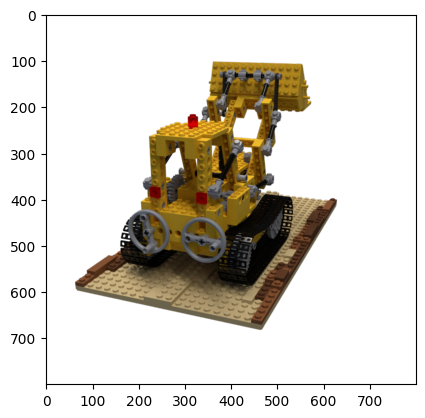

In [3]:
#显示gt_image_tensor
plt.imshow(gt_image_tensor)

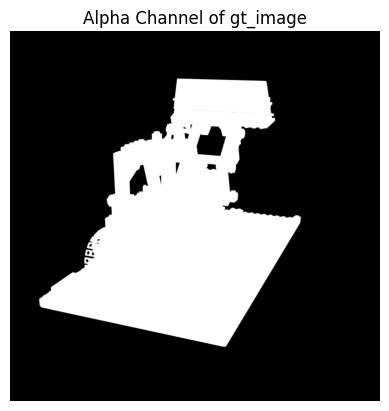

In [4]:
# 提取alpha通道
alpha_channel = gt_image_np[:, :, 3]

# 可视化alpha通道
plt.imshow(alpha_channel, cmap='gray')
plt.axis('off')  # 不显示坐标轴
plt.title('Alpha Channel of gt_image')
plt.show()

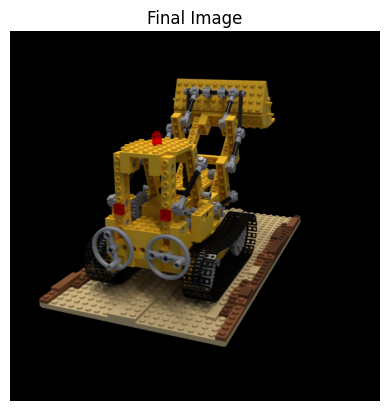

In [5]:
background=np.array([0,0,0], dtype=np.float32)
# background[:,None,None].shape
gt_image_rgb=gt_image_np[:,:,:3]
#对gt_image_rgb进行归一化
gt_image_rgb = (gt_image_rgb / 255.0).clip(0.0, 1.0)
alpha_channel=alpha_channel/255.0
alpha_channel=alpha_channel[:,:,None]
gt_image_final=gt_image_rgb*alpha_channel+background*(1-alpha_channel)
#对gt_image_final进行归一化
# gt_image_final = (gt_image_final / 255.0).clip(0.0, 1.0)
#可视化合成后的图像
plt.imshow(gt_image_final)
plt.axis('off')  # 不显示坐标轴
plt.title('Final Image')
plt.show()

In [6]:
pbr_image.size

(800, 800)

In [7]:
x=torch.tensor([1,2,3,4])
x[0:2]

tensor([1, 2])

In [8]:
y=np.array([1,2,3,4])
y[::2]
np.random.shuffle(y)
y

array([2, 4, 3, 1])

In [9]:
(128*128*3)**0.5

221.70250336881628

In [10]:
np.round(2.2)

2.0

In [11]:
import torch

# 创建一个张量并启用梯度计算
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = x * 2

y.retain_grad()
# 默认情况下，中间张量 y 的梯度不会被保留
print(y.grad)  # 输出: None

# 调用 retain_grad 方法来保留 y 的梯度
# y.retain_grad()

# 定义一个损失函数并进行反向传播
loss = y.sum()
loss.backward()

# 现在可以访问 y 的梯度
print(y.grad)  # 输出: tensor([1., 1., 1.])

None
tensor([1., 1., 1.])


In [12]:
x=torch.randn(2,3)
x

tensor([[-0.5448, -0.3656, -0.1462],
        [-2.2822,  0.4686,  0.4146]])

In [15]:
x>0

tensor([[False, False, False],
        [False,  True,  True]])

In [14]:
x.sum()

tensor(2.)

In [4]:
import subprocess
import numpy as np
cmd = 'nvidia-smi -q -d Memory |grep -A4 GPU|grep Used'
result = subprocess.run(cmd, shell=True, stdout=subprocess.PIPE).stdout.decode().split('\n')

In [5]:
result

['        Used                              : 3355 MiB',
 '        Used                              : 3719 MiB',
 '        Used                              : 14 MiB',
 '        Used                              : 14 MiB',
 '']

In [6]:
str(np.argmin([int(x.split()[2]) for x in result[:-1]]))

'2'

In [8]:
result[0].split()

['Used', ':', '3355', 'MiB']